In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append("/mnt/storage/documents/IBS_PhD/programming/ABTT") 
from ABTT.local_resolution.spatial import SpatialLocRes

### Load in necessary files
 - local resolution volume (from RELION: postprocess_locres.mrc)
 - mask (mask in which you want to consider the local resolution values)

In [2]:
%%bash
ls spatial_locres

emd_10041_msk_1.mrc
postprocess_locres_filtered.mrc
postprocess_locres.mrc


In [3]:
local_resolution_volume = 'spatial_locres/postprocess_locres.mrc'
mask = 'spatial_locres/emd_10041_msk_1.mrc'
S = SpatialLocRes(local_resolution_volume, mask)

### Calculate the local resolution distribution inside the mask

In [4]:
local_resolution_distribution = S.simple()

<IPython.core.display.Javascript object>


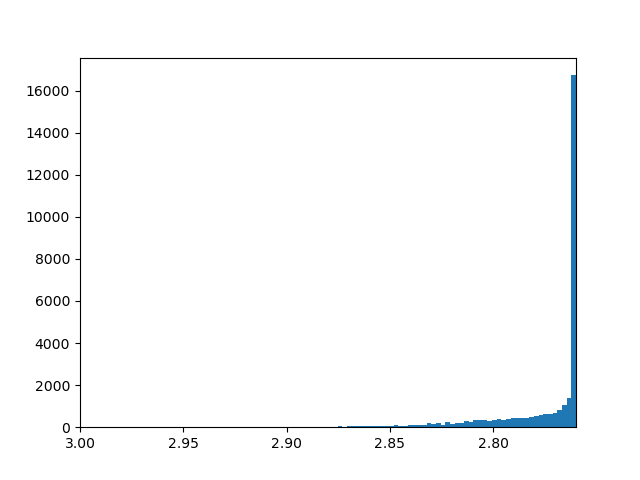

(3, 2.76)

In [5]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.hist(local_resolution_distribution, bins=100)
ax.set_xlim(3,1.38*2)

### Kmeans clustering of local resolution values and spatial location
- choose number of clusters

<IPython.core.display.Javascript object>


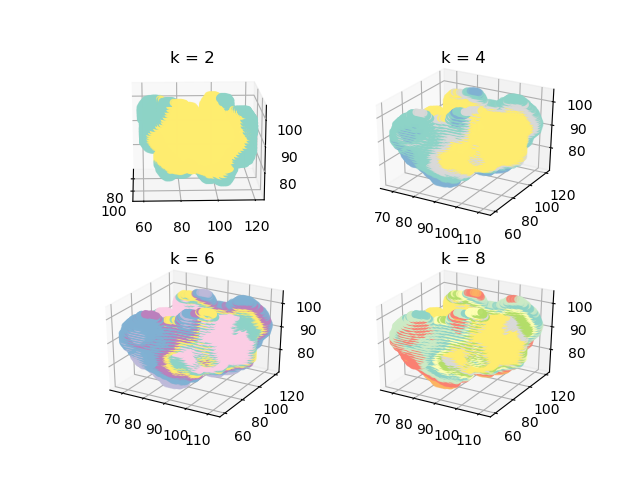

/home/aburt/anaconda3/envs/ABTT/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/aburt/anaconda3/envs/ABTT/lib/python3.7/site-packages/scipy/cluster/vq.py:579: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

for idx, k in enumerate((2,4,6,8)):
    S.kmeans(k)
    z = S.kmeans_out[0][:,0]
    y = S.kmeans_out[0][:,1]
    x = S.kmeans_out[0][:,2]
    c = S.kmeans_out[1]


    ax = fig.add_subplot(2,2,idx+1, projection='3d')
    ax.set_title(f'k = {k}')
    ax.scatter(x, y, z, c=c, cmap='Set3')